# 산업경영수리기법 HW#2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 3.2.(a)

In [191]:
def clgs(A):
    m = A.shape[0]
    n = A.shape[1]
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i],A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    return Q,R

In [17]:
def mgs(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = A.copy()
    R = np.zeros((n,n))
    for i in range(n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i ,i+1:n] = np.matmul(Q[:,i].T, Q[:,i+1:n])
        Q[:, i+1:n] = Q[:, i+1:n] - np.matmul(Q[:,i].reshape(-1,1),R[i,i+1:n].reshape(1,-1))
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q,R

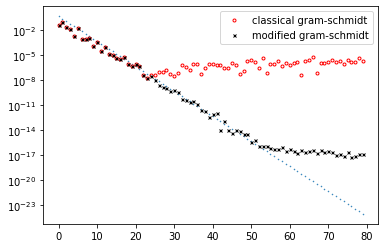

In [193]:
U,X = np.linalg.qr(np.random.randn(80,80))
V, X = np.linalg.qr(np.random.randn(80,80))
x = np.array(range(-1,-81,-1),dtype=float)
S = np.diag(2**x)
A = np.matmul(np.matmul(U,S),V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)
plt.plot(2**x,'.',ms=1)
plt.plot(np.diag(Rc),"ro",ms=3,fillstyle = 'none',label="classical gram-schmidt")
plt.plot(np.diag(Rm),"kx",ms = 3,label="modified gram-schmidt")
plt.yscale("log")
plt.legend()

###### modified gram schmidt 알고리즘이 대수적으로 더 안정적이다. 즉 round off error 가 더 작다. 

### Exercise 3.2.(b)

In [65]:
def qrhouse(A):
    m = A.shape[0]
    n = A.shape[1]
    R = A.copy()
    V = np.zeros((m,n))
    for k in range(min(m-1,n)):
        x = R[k:m, k].reshape(-1,1)
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)
        V[k:m, k] = v.reshape(-1)
        R[k:m, k:n] = R[k:m, k:n] - np.matmul((2*v),(np.matmul(v.T,R[k:m,k:n])))/np.matmul(v.T,v)
    #R = np.triu(R[:n,:n])
    return V,R

In [31]:
def formQ(V):
    m = V.shape[0]
    n = V.shape[1]
    Q = np.eye(m,m)
    for j in range(min(m-1,n)-1,-1,-1):
        v = V[:,j]
        v = v.reshape(-1,1)
        Q = Q-np.matmul((2*v),np.matmul(v.T,Q))/np.matmul(v.T,v)
    return Q

In [362]:
A = np.array([[0.70000, 0.70711],
             [0.70001, 0.70711]])
Qm, Rm = mgs(A)
V,R = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.matmul(Qm.T,Qm)-np.eye(2,2)))
print(np.linalg.norm(np.matmul(Q.T,Q)-np.eye(2,2)))


3.2547231622285317e-11
3.236828524569469e-16


###### householder 방식이 더 대수적으로 안정적이다.

### Exercise 3.3 

In [271]:
def givensQR(A):
    m = A.shape[0]
    n = A.shape[1]
    if (m<n):
        print("dimension size does not match")
        return None
    
    Q = np.eye(m)
    R = A.copy()
    
    for i in range(1,m):
        for j in range(i):
            if R[i,j]==0:
                continue
            x = R[j,j]
            y = R[i,j]
            r = np.sqrt(x**2 + y**2)
            c = x/r
            s = y/r
            G = np.eye(m)
            G[i,i] = c
            G[j,j] = c
            G[j,i] = s
            G[i,j] = -s
            R = np.matmul(G,R)
            Q = np.matmul(Q,G.T)
            
    return Q,R

In [282]:
def check3_3():
    A = np.random.randn(4,3)
    Q, R = givens_rotation(A)
    assert(np.allclose(R, np.triu(R)))
    assert(np.allclose(np.eye(4),np.matmul(Q.T,Q)))
    print("통과")

In [283]:
check3_3()

통과


### Exercise 4.3.(a)

In [381]:
def draw_all(x):
    res = []
    for m in  x:
        A = np.random.randn(m,m)/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        eig_val_norm = np.abs(eig_val)
        a = len(eig_val_norm)
        plt.plot(m*np.ones(a),eig_val_norm,'.')

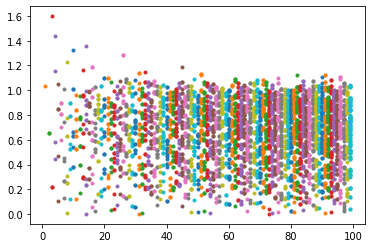

In [382]:
draw_all(range(100))

###### 행렬의 크기가 커질수록 eigen value값들이 0부터 1사이에 균일하게 존재하고, 1 쪽이 좀 더 촘촘하다.

In [383]:
def draw_spec(x):
    res = []
    for i in range(x):
        m = 2**i
        A = np.random.randn(m,m)/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        spec_radius = np.sort(np.abs(eig_val))[-1]
        res.append(spec_radius)
    plt.plot(res)

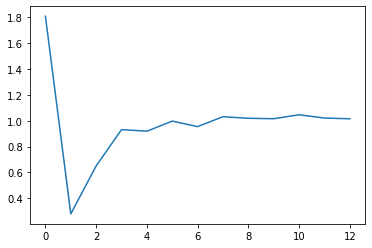

In [384]:
draw_spec(13)

###### spectral radius 값은 1에 가까워진다.

### Exercise 4.3(b)

In [385]:
def draw_spec_norm(x):
    res_spec = []
    res_norm = []
    for i in range(x):
        m = 2**i
        A = np.random.randn(m,m)/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        spec_radius = np.sort(np.abs(eig_val))[-1]
        res_spec.append(spec_radius)
        norms = np.linalg.norm(A, ord=2)
        res_norm.append(norms)
    plt.plot(res_spec, label="spectral radius")
    plt.plot(res_norm, label="2-norm")
    plt.legend()
    

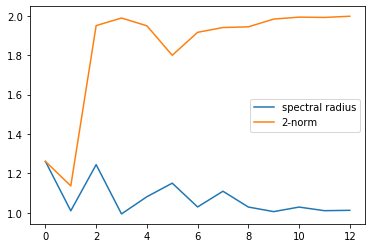

In [386]:
draw_spec_norm(13)

###### 행렬의 2-norm값은 2에 가까워지는 형태이다. 따라서 행렬의 크기가 커지면서 부등호의 등호성립조건에 가까워지지는 않는다. 

### Exercise 4.3(c)

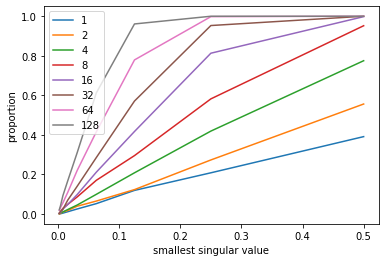

In [400]:
for m in 2.**np.array(range(8)):
    m = int(m)
    small_eig_list = []
    propor = []
    for i in range(1000):
        A = np.random.randn(m,m)/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        smallest_eig = np.sort(np.abs(eig_val))[0]
        small_eig_list.append(smallest_eig)
    eig_list = np.array(small_eig_list)
    s = 2.**np.array(range(-1,-10,-1))
    for j in s:
        propor.append(np.sum(eig_list<j)/len(eig_list))
    plt.plot(s,propor,label="{0}".format(m))
    plt.legend()
    plt.ylabel("proportion")
    plt.xlabel("smallest singular value")

###### 행렬의 크기가 커질수록, smallest singular value의 값이 0으로 가까워지는 행렬의 비율이 늘어나는 것을 알 수 있다. 

### Exercise4.3(d)

In [401]:
def draw_all_tri(x):
    res = []
    for m in  x:
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        eig_val_norm = np.abs(eig_val)
        a = len(eig_val_norm)
        plt.plot(m*np.ones(a),eig_val_norm,'.')

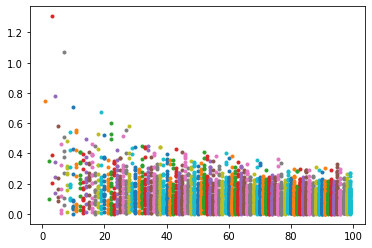

In [403]:
draw_all_tri(range(100))

###### Eigenvalue의 값들이 그래프 상에서는 0부터 0.25 사이에 많이 존재하지만, 행렬의 크기가 커질수록 eigen value의 크기가 점점 0에 가까워질 것임을 알 수 있다. 

In [404]:
def draw_spec_tri(x):
    res = []
    for i in range(x):
        m = 2**i
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        spec_radius = np.sort(np.abs(eig_val))[-1]
        res.append(spec_radius)
    plt.plot(res)

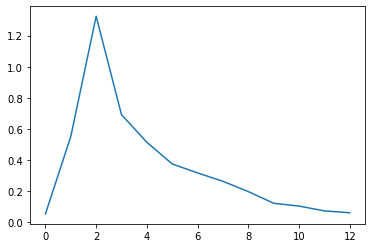

In [405]:
draw_spec_tri(13)

###### 행렬의 크기가 커질수록 spectral radius의 값이 0에 가까워진다. 

In [409]:
def draw_spec_norm_tri(x):
    res_spec = []
    res_norm = []
    for i in range(x):
        m = 2**i
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        spec_radius = np.sort(np.abs(eig_val))[-1]
        res_spec.append(spec_radius)
        norms = np.linalg.norm(A, ord=2)
        res_norm.append(norms)
    plt.plot(res_spec, label="spectral radius")
    plt.plot(res_norm, label="2-norm")
    plt.legend()
    

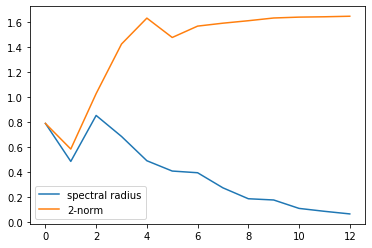

In [410]:
draw_spec_norm_tri(13)

###### 행렬의 크기가 커질수록 2-norm의 값은 1.6에 가까워지고, 행렬의 크기가 커질 때 등호성립은 하지 않는다. 

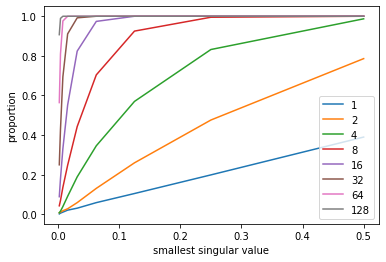

In [411]:
for m in 2.**np.array(range(8)):
    m = int(m)
    small_eig_list = []
    propor = []
    for i in range(1000):
        A = np.triu(np.random.randn(m,m))/np.sqrt(m)
        eig_val = np.linalg.eig(A)[0]
        smallest_eig = np.sort(np.abs(eig_val))[0]
        small_eig_list.append(smallest_eig)
    eig_list = np.array(small_eig_list)
    s = 2.**np.array(range(-1,-10,-1))
    for j in s:
        propor.append(np.sum(eig_list<j)/len(eig_list))
    plt.plot(s,propor,label="{0}".format(m))
    plt.legend()
    plt.ylabel("proportion")
    plt.xlabel("smallest singular value")

###### 행렬의 크기가 커질수록, smallest singular value의 값이 0으로 가까워지는 행렬의 비율이 늘어나는 것을 알 수 있고, random matrix일 때보다 그 비율 자체가 훨씬 빠르게 증가함을 알 수 있다. 

In [44]:
m = 50
n = 12

In [45]:
t = np.linspace(0,1,m)

In [46]:
A = np.vander(t, n, increasing=True)

In [47]:
b = np.cos(4*t)

### Exercise 4.6(a)

In [25]:
x_a = np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,b))

In [26]:
x_a

array([ 9.99999982e-01,  5.31319312e-06, -8.00019839e+00,  2.89941204e-03,
        1.06446826e+01,  9.82716566e-02, -5.96584670e+00,  5.09955043e-01,
        1.00057112e+00,  5.17144824e-01, -5.87755344e-01,  1.26626885e-01])

### Exercise 4.6(b)

In [27]:
Q, R = mgs(A)
x_b = np.linalg.solve(R, np.matmul(Q.T,b))

In [28]:
x_b

array([ 1.00000000e+00, -3.06805763e-07, -7.99998542e+00, -2.59043151e-04,
        1.06689862e+01, -1.18629667e-02, -5.65250336e+00, -6.55730536e-02,
        1.68230256e+00,  1.42165330e-02, -3.77603616e-01,  8.86388520e-02])

### Exercise 4.6(c)

In [69]:
V, R = qrhouse(A)

In [70]:
c = b.copy()

In [71]:
for j in range(min(m-1,n)):
    v = V[j:m,j].reshape(-1,1)
    c[j:m] = c[j:m] - np.matmul((2*v),np.matmul(v.T,c[j:m]))/np.matmul(v.T,v)

In [76]:
x_c = np.linalg.solve(np.matmul(R.T,R), np.matmul(R.T,c))

In [78]:
x_c

array([ 1.00000001e+00, -3.65778637e-06, -7.99986042e+00, -2.09159379e-03,
        1.06829573e+01, -7.46912426e-02, -5.47490576e+00, -3.89961976e-01,
        2.06469701e+00, -2.66688328e-01, -2.60666549e-01,  6.75715751e-02])

### Exercise 4.6(d)

In [79]:
Q, R = np.linalg.qr(A)
x_d = np.linalg.solve(R, np.matmul(Q.T,b))

In [80]:
x_d

array([ 1.00000000e+00, -4.22743149e-07, -7.99998124e+00, -3.18763289e-04,
        1.06694308e+01, -1.38202896e-02, -5.64707562e+00, -7.53160313e-02,
        1.69360697e+00,  6.03210351e-03, -3.74241701e-01,  8.80405757e-02])

### Exercise 4.6(e)

###### python에서 A|b에 해당하는 연산을 찾지 못하였습니다. 

### Exercise 4.6(f)

In [106]:
u, s, vh = np.linalg.svd(A,full_matrices = False)

In [114]:
x_f = np.matmul(np.matmul(vh.T, np.linalg.pinv(np.diag(s))),np.matmul(u.T,b))

In [116]:
x_f

array([ 1.00000000e+00, -4.22743148e-07, -7.99998124e+00, -3.18763286e-04,
        1.06694308e+01, -1.38202895e-02, -5.64707562e+00, -7.53160310e-02,
        1.69360697e+00,  6.03210363e-03, -3.74241701e-01,  8.80405757e-02])

### Exercise4.7(f)

#### check (a)~(f)

In [117]:
for x in [x_a, x_b, x_c, x_d, x_f]:
    assert(np.allclose(np.matmul(np.matmul(A.T,A),x),np.matmul(A.T,b)))
print("테스트 통과")

테스트 통과
